Imports and definitions of functions to calculate relaxation rate constants

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

def J(omega,tau):
  return 2/5*tau/(1+(omega*tau)**2)

def T1(delta,sigmazzS,omegaI,omegaS,tau):
  return ((delta/4)**2*(1*J(omegaI-omegaS,tau)+3*J(omegaS,tau)+6*J(omegaI+omegaS,tau))+\
            3/4*(sigmazzS*omegaS)**2*J(omegaS,tau))**(-1)

def T1x(delta,omegaI,omegaS,tau):
  return ((delta/4)**2*(-1*J(omegaI-omegaS,tau)+6*J(omegaI+omegaS,tau)))**(-1)

Define constants

In [2]:
mu0 = 4*np.pi*1e-7                 #V s / A / m
mu04pi = 1e-7
hbar = 1.05457266e-34              #J s / rad
h = 2*np.pi*hbar                   #J s
gammaH = 26.7522128e7              #rad / s / T
gammaN = -2.7116e7                 #rad / s / T
rNH = 1.1*1e-10                    #m 
omegaS = 14.1*gammaN
omegaI = 14.1*gammaH
deltaHN = -2*mu04pi*gammaN*gammaH*hbar/rNH**3
sigmazz00=0
tauc=1e-10

Calculation solution (CSA=0)

In [5]:
T1S = T1(deltaHN,sigmazz00,omegaI,omegaS,tauc)
T1I = T1(deltaHN,sigmazz00,omegaS,omegaI,tauc)
T1IS = T1x(deltaHN,omegaS,omegaI,tauc);
R = np.array([[1/T1I,1/T1IS],[1/T1IS,1/T1S]]);
t = np.arange(0,15.01,.01)
Sz=np.zeros(len(t))
Iz=np.zeros(len(t))
for k,t0 in enumerate(t): 
    z = expm(-R*t0)@np.array([[0],[-2]])+np.array([[10],[1]])
    Iz[k]=z[0]
    Sz[k]=z[1]

Plot the results

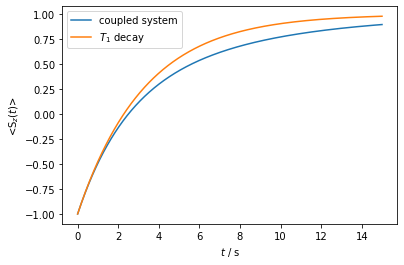

In [7]:
ax=plt.figure().add_subplot(111)
ax.plot(t,Sz)
ax.plot(t,np.exp(-t/T1S)*(-2)+1)
ax.set_ylabel(r'<S$_z$($t$)>')
ax.set_xlabel(r'$t$ / s')
ax.legend(['coupled system',r'$T_1$ decay'])